# Movie Recommendation Chatbot

This Jupyter notebook contains a basic chatbot that recommends movies based on the genre. The chatbot can identify a genre in a user's message and recommend a random movie of that genre. The user can also ask for a random movie or choose a new genre.


## Imports and Setup

Here, we import the necessary libraries and perform the setup required for the project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/indigowolf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Data Loading and Processing

In this section, we load and process the IMDb dataset. The dataset is cleaned to remove any rows with missing genre or title information.

In [2]:
# Read the dataset
movies_df = pd.read_csv('IMDb movies.csv')

In [3]:
print(movies_df.columns)

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')


In [4]:
# Drop rows with missing values in 'Genre' or 'Series_Title' columns
movies_df = movies_df.dropna(subset=['Genre', 'Series_Title'])

## Identifying Unique Genres

Now that we have cleaned our data, we need to identify all the unique genres present in the dataset. This will be important for our movie recommendation function, which needs to verify whether the genre input by the user is present in the dataset.

We'll extract all unique genres and store them in a set for easy and fast checking of whether a particular genre exists.

In [5]:
# Extract unique genres from the dataset
unique_genres = set()

for genre_str in movies_df['Genre']:
    genres = genre_str.split(',')
    unique_genres.update([genre.strip().lower() for genre in genres])

print(unique_genres)

{'drama', 'biography', 'family', 'thriller', 'animation', 'fantasy', 'comedy', 'action', 'history', 'romance', 'war', 'sci-fi', 'horror', 'crime', 'film-noir', 'music', 'sport', 'mystery', 'adventure', 'western', 'musical'}


## Data Exploration

In this section, we will explore our IMDb movie dataset. Exploratory data analysis (EDA) is a critical step in any data science project. It helps us understand the structure of the data, identify outliers, extract insights, and formulate appropriate data preprocessing strategies.

Let's start by looking at the distribution of movies across genres in our dataset. This will give us a sense of the diversity of movie genres available for recommendations.

Understanding the distribution can also help inform us of the potential biases our movie recommendation system might have. For instance, if our dataset contains more Action movies compared to other genres, our chatbot might end up recommending more Action movies.

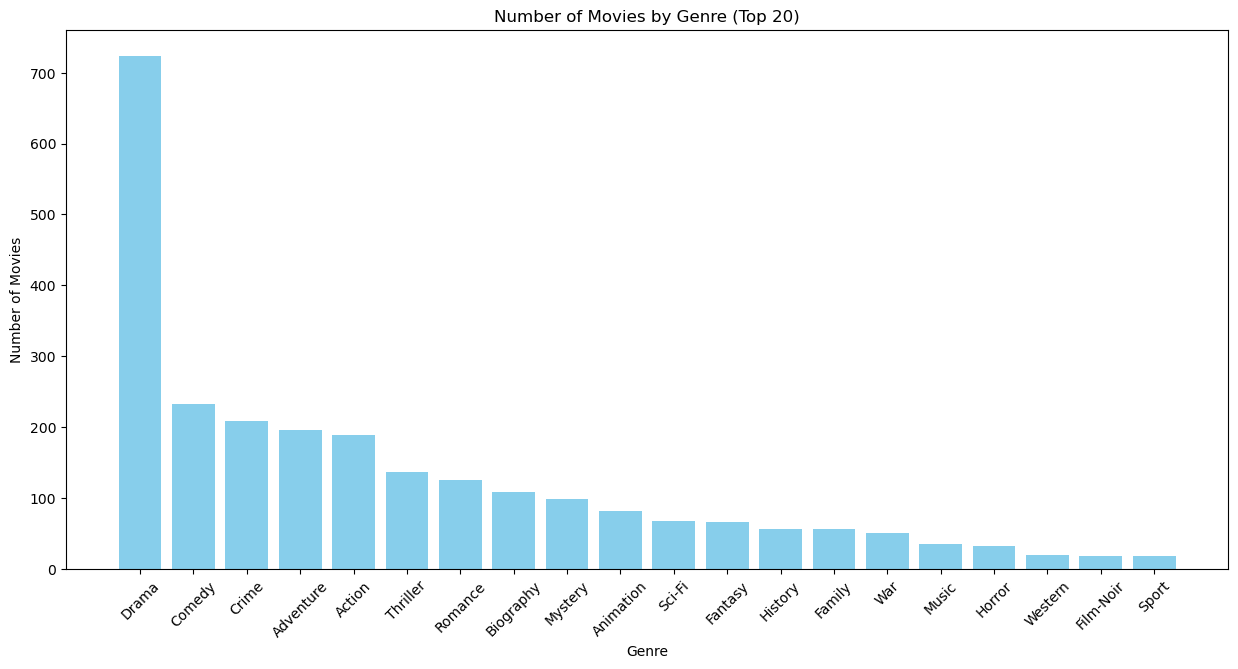

In [6]:
import matplotlib.pyplot as plt

# Split the genres and count each genre separately
genre_counts = movies_df['Genre'].str.split(',').explode().str.strip().value_counts()

# Take the top 20 genres
top_genres = genre_counts[:20]

# Create a bar plot
plt.figure(figsize=(15, 7))
plt.bar(top_genres.index, top_genres.values, color='skyblue')
plt.title('Number of Movies by Genre (Top 20)')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


The bar plot above shows the number of movies available in our dataset for each genre. 

From this visualization, we can infer that drama is by far the most popular genre, and that all genres not listed have fewer than ~20 movies listed in this dataset.

Next, we will use this understanding of our data to build our chatbot, aiming to provide diverse movie recommendations based on user input. If the user selects 'Drama' as their genre, the chatbot will ask for a secondary genre to help narrow down suggestions for the user.

## Function Definitions

Here, we define several functions that our chatbot will use:

- `recommend_movie(genre)`: Given a genre, this function returns a movie from that genre.
- `identify_genres(message)`: This function tokenizes a user's message and identifies any movie genres.

In [7]:
def recommend_movie(user_genre):
    user_genre = user_genre.lower()
    
    if user_genre not in unique_genres:
        print("This genre is not recognized. Please enter another one.")
        return None

    if user_genre == 'drama':
        print("Drama is a broad genre. Could you provide a second genre to narrow down the recommendations?")
        secondary_genre = input("Please enter a secondary genre: ").strip().lower()
        genre_movies = movies_df[movies_df['Genre'].apply(lambda x: user_genre in x.lower() and secondary_genre in x.lower())]
    else:
        genre_movies = movies_df[movies_df['Genre'].apply(lambda x: user_genre in x.lower())]
        
    if genre_movies.empty:
        print(f"We don't have any movies in the genre {user_genre} right now. Please try another genre.")
        return None

    movie = genre_movies.sample(1)
    movie_title = movie['Series_Title'].values[0]
    movie_genre = movie['Genre'].values[0]
    movie_star1 = movie['Star1'].values[0]
    movie_star2 = movie['Star2'].values[0]

    print(f"\nHow about the movie '{movie_title}'? It's a {movie_genre} movie starring {movie_star1} and {movie_star2}. Enjoy!")


In [8]:
def identify_genres(message):
    # Tokenize the message into words
    words = nltk.word_tokenize(message)
    
    # Identify genres in the list of words
    identified_genres = [word for word in words if word.lower() in unique_genres]
    
    return identified_genres

## Main Chatbot Function

The `run_chatbot()` function is where the main loop of our chatbot lives. It takes user input, identifies commands and genres in the input, and responds with appropriate messages.

In [9]:
def run_chatbot():
    print("Hello! I can recommend movies for you. What genre would you like me to pick from?")
    print("You can also type 'shuffle' for a random movie or 'new genre' to choose a new genre.")
    print("Type 'quit' at any time to stop.")

    genre = None

    while True:
        user_message = input()

        if user_message.lower() == 'quit':
            print("Goodbye!")
            break
        elif user_message.lower() == 'shuffle':
            movie_recommendation = recommend_movie(random.choice(list(unique_genres)))
            print(movie_recommendation)
            continue
        elif user_message.lower() == 'new genre':
            genre = None
            print("Okay, tell me a new genre you like.")
            continue

        if not genre:
            identified_genres = identify_genres(user_message)

            if not identified_genres:
                print("I couldn't identify a genre in your message. Here are some genres you can choose from:")
                print(random.sample(list(unique_genres), 10))  # print 10 random genres
                continue
            else:
                # For simplicity, we'll just use the first genre identified
                genre = identified_genres[0]

        movie_recommendation = recommend_movie(genre)
        print(movie_recommendation)


## Running the Chatbot

Now, we can start a conversation with the chatbot! Type your message in the input box when prompted. You can ask for a movie recommendation by genre, request a random movie with 'shuffle', or choose a new genre with 'new genre'. To stop the chatbot, simply type 'quit'.

In [ ]:
run_chatbot()

Hello! I can recommend movies for you. What genre would you like me to pick from?
You can also type 'shuffle' for a random movie or 'new genre' to choose a new genre.
Type 'quit' at any time to stop.
drama
Drama is a broad genre. Could you provide a second genre to narrow down the recommendations?
Please enter a secondary genre: comedy

How about the movie 'When Harry Met Sally...'? It's a Comedy, Drama, Romance movie starring Billy Crystal and Meg Ryan. Enjoy!
None


## Lessons Learned and Future Improvements

Through this project, I learned the importance of data cleaning and preprocessing, especially when working with text data like movie genres. I also learned how to build a simple interactive chatbot and gained experience with various Python libraries such as pandas and matplotlib. I also practiced using lambda functions.

There were challenges along the way, such as ensuring the chatbot can handle various user inputs robustly. I overcame this by carefully considering different possible inputs the user could give and handling each case in the code.

In the future, this project could be expanded in several ways:

1. **More Personalization**: The chatbot could remember users' past preferences to tailor future recommendations. 

2. **Adding More Movie Information**: We could make use of more information in the dataset, such as director, duration, or IMDB rating, to provide more detailed recommendations.

3. **User Feedback**: We could allow users to give feedback on the recommendations, which could be used to further refine the recommendations.

4. **Multiple Recommendations**: The chatbot could provide multiple movie recommendations at once, giving the user more choices.

This project was a great learning experience and I look forward to applying these lessons in future data science projects.
